In [110]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

from sklearn import linear_model as lm, model_selection as ms, preprocessing
from sklearn.pipeline import Pipeline

from sklearn import ensemble, model_selection as ms, tree

In [111]:
Boston = pd.read_csv('datasets/train.csv')

In [112]:
Boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [72]:
Boston.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [73]:
Boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


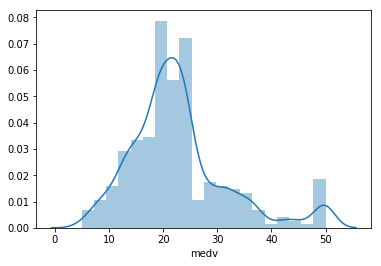

In [74]:
sns.distplot(Boston['medv'], bins=20)

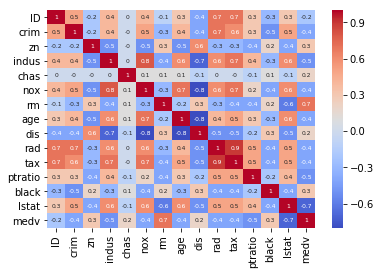

In [75]:
sns.heatmap(data=Boston.corr().round(1), cmap='coolwarm', annot=True, annot_kws={"size":6})

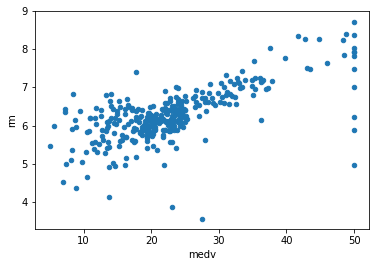

In [76]:
Boston.plot.scatter(x='medv', y='rm')

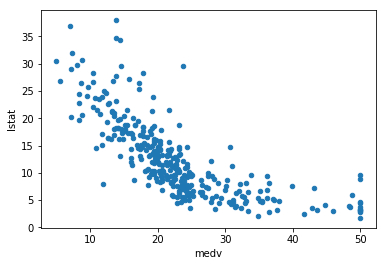

In [77]:
Boston.plot.scatter(x='medv', y='lstat')

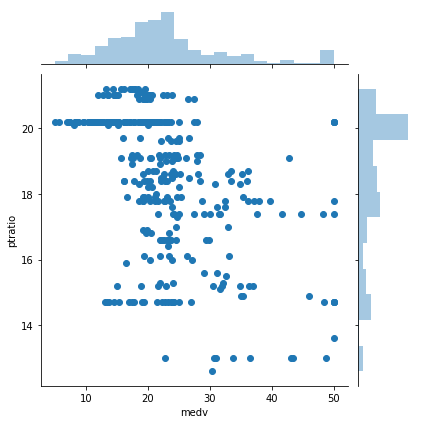

In [78]:
sns.jointplot(x='medv', y='ptratio', data=Boston)

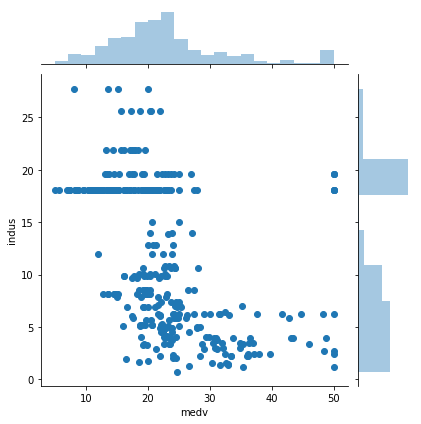

In [79]:
sns.jointplot(x='medv', y='indus', data=Boston)

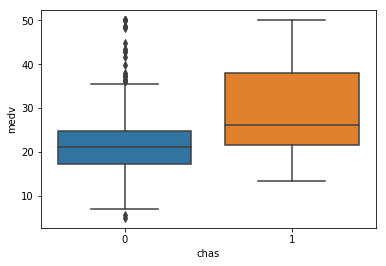

In [80]:
sns.boxplot(x='chas', y='medv', data=Boston)

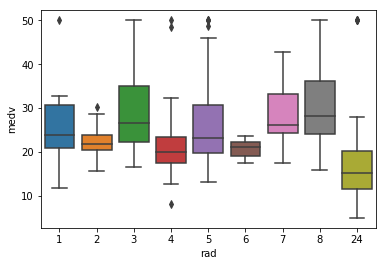

In [81]:
sns.boxplot(x='rad', y='medv', data=Boston)

In [82]:
model = smf.ols(
    'medv ~ rm + lstat + ptratio + crim + zn + age + dis + black + indus + age + nox + rad + chas + tax',
    data=Boston
).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     67.41
Date:                Sun, 19 May 2019   Prob (F-statistic):           2.89e-83
Time:                        15:40:32   Log-Likelihood:                -990.09
No. Observations:                 333   AIC:                             2008.
Df Residuals:                     319   BIC:                             2061.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0454      6.296      5.407      0.000      21.658      46.433
rm             3.7688      0.520      7.247      0.000       2.746       4.792
lstat         -0.6003      0.064     -9.403      0.000      -0.726      -0.475
ptratio       -0.8570      0.165     -5.183      0.000      -1.182      -0.532
crim          -0.0525      0.054     -0.976      0.330      -0.158       0.053
zn             0.0474      0.017      2.805      0.005       0.014       0.081
age           -0.0046      0.017     -0.274      0.784      -0.038       0.029
dis           -1.5488      0.264     -5.860      0.000      -2.069      -1.029
black          0.0117      0.004      3.243      0.001       0.005       0.019
indus          0.0539      0.074      0.725      0.469      -0.092       0.200
nox          -15.7397      4.856     -3.241      0.001     -25.293      -6.186
rad            0.3290      0.082      4.019      0.000       0.168       0.490
chas           3.7849      1.150      3.292      0.001       1.523       6.047
tax           -0.0129      0.005     -2.847      0.005      -0.022      -0.004
==============================================================================
Omnibus:                      125.336   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.547
Skew:                           1.611   Prob(JB):                    8.19e-107
Kurtosis:                       7.983   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

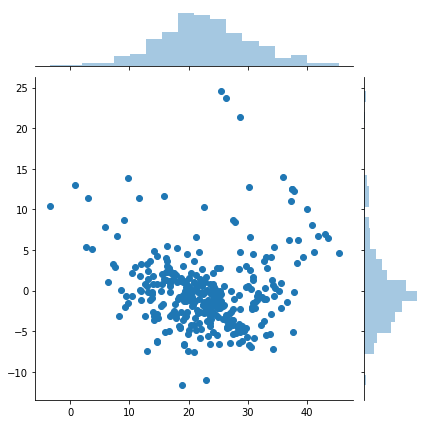

In [83]:
sns.jointplot(model.fittedvalues, model.resid)

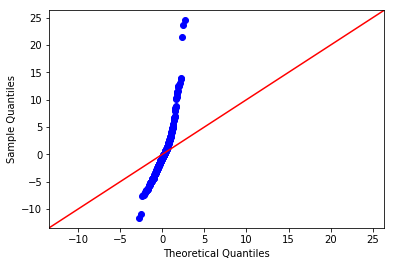

In [84]:
qqplot(model.resid, line='45');

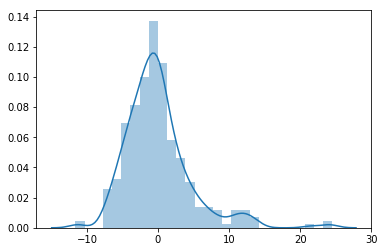

In [85]:
sns.distplot(model.resid)

In [86]:
Log_medv = np.log(Boston['medv'])

In [87]:
model = smf.ols(
    'Log_medv ~ rm + lstat + ptratio + crim + zn + age + dis + black + indus + age + nox + rad + chas + tax',
    data=Boston
).fit()

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Log_medv   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     92.94
Date:                Sun, 19 May 2019   Prob (F-statistic):          4.66e-100
Time:                        17:08:10   Log-Likelihood:                 92.031
No. Observations:                 333   AIC:                            -156.1
Df Residuals:                     319   BIC:                            -102.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9740      0.244     16.272      0.000       3.494       4.455
rm             0.0867      0.020      4.295      0.000       0.047       0.126
lstat         -0.0306      0.002    -12.353      0.000      -0.035      -0.026
ptratio       -0.0348      0.006     -5.432      0.000      -0.047      -0.022
crim          -0.0107      0.002     -5.134      0.000      -0.015      -0.007
zn             0.0014      0.001      2.065      0.040    6.43e-05       0.003
age           -0.0003      0.001     -0.483      0.629      -0.002       0.001
dis           -0.0524      0.010     -5.111      0.000      -0.073      -0.032
black          0.0005      0.000      3.851      0.000       0.000       0.001
indus          0.0033      0.003      1.150      0.251      -0.002       0.009
nox           -0.6200      0.188     -3.292      0.001      -0.991      -0.249
rad            0.0152      0.003      4.773      0.000       0.009       0.021
chas           0.1382      0.045      3.098      0.002       0.050       0.226
tax           -0.0006      0.000     -3.428      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       41.102   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.009
Skew:                           0.434   Prob(JB):                     2.96e-35
Kurtosis:                       6.272   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

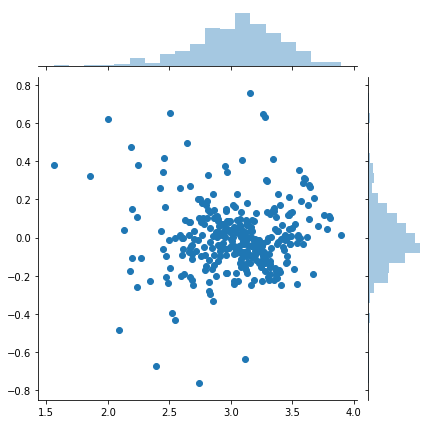

In [89]:
sns.jointplot(model.fittedvalues, model.resid)

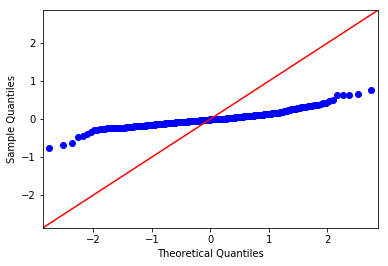

In [90]:
qqplot(model.resid, line='45');

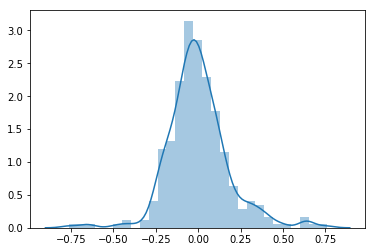

In [91]:
sns.distplot(model.resid)

In [113]:
X = Boston[['rm', 'lstat']]
y = Boston['medv']
model = lm.LinearRegression().fit(X, y)

In [114]:
list(zip(X.columns, model.coef_))

[('rm', 4.928465230000202), ('lstat', -0.6563941448091443)]

In [115]:
cv = ms.KFold(n_splits=5, shuffle=True, random_state=42)

In [116]:
mses = ms.cross_val_score(lm.LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=cv)
np.mean(-mses)

31.405540574883787

In [117]:
X = Boston[['rm', 'lstat', 'chas']]

In [118]:
mses = ms.cross_val_score(lm.LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=cv)
np.mean(-mses)

30.219901560451

In [11]:
X = Boston[['rm', 'lstat', 'chas', 'ptratio']]

In [12]:
mses = ms.cross_val_score(lm.LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=cv)
np.mean(-mses)

28.694735799252776

In [13]:
X = Boston[['rm', 'lstat', 'chas', 'ptratio', 'crim', 'zn']]

In [14]:
mses = ms.cross_val_score(lm.LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=cv)
np.mean(-mses)

28.80498669635392

In [122]:
X = Boston.drop(columns=['medv', 'ID'])
y = Boston['medv']

In [123]:
mses = ms.cross_val_score(lm.LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=cv)
np.mean(-mses)

25.55944372157733

In [121]:
scaled_lasso = Pipeline([
    ('std', preprocessing.StandardScaler()),
    ('reg', lm.Lasso())
])

gs = ms.GridSearchCV(estimator=scaled_lasso,
                     param_grid={'reg__alpha': np.logspace(-10, 10, 21)},
                     scoring='neg_mean_squared_error',
                     cv=cv)
gs.fit(X, y)

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 wer

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 wer

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converte

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 wer

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converte

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converte

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg__alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
-gs.best_score_

25.458478772090714

In [37]:
list(zip(X.columns, lm.LinearRegression().fit(X, y).coef_))

[('ID', -0.005714128285885237),
 ('crim', -0.04882885765463125),
 ('zn', 0.04083430853484335),
 ('indus', -0.025842108924431523),
 ('chas', 4.037402873552314),
 ('nox', -16.11235481298941),
 ('rm', 4.042848628021825),
 ('age', -0.013763501266360584),
 ('dis', -1.6423038284888696),
 ('rad', 0.21308329206556098),
 ('ptratio', -0.8715932174992407),
 ('black', 0.012186821286207851),
 ('lstat', -0.5953224714705493)]

In [99]:
X = Boston.drop(columns=['medv', 'tax'])
y = Boston['medv']

In [100]:
rf1 = ensemble.RandomForestRegressor(n_estimators=20, random_state=42)
rf1.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
mses = ms.cross_val_score(rf1, X, y, scoring='neg_mean_squared_error', cv=cv)
np.mean(-mses)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.